# Curved lane detection using classical image processing

In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import cv2 
import glob
%matplotlib inline

## Transforming images into thresholded binary images using color transforms and gradients

In [2]:
# magnitude thresholding 
def thresh_mag(img, kernel=3, thresh=[0,255]):
    x= cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=kernel)
    y= cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=kernel)
    #gradient magnitude
    mag_grad= np.sqrt(x**2 + y**2)
    #rescaling to 8 bits
    scale = np.max(mag_grad)/255 
    mag_grad = (mag_grad/scale).astype(np.uint8)
    output = np.zeros_like(mag_grad)
    output[(mag_grad >= thresh[0]) & (mag_grad <= thresh[1])] = 1
    
    return output

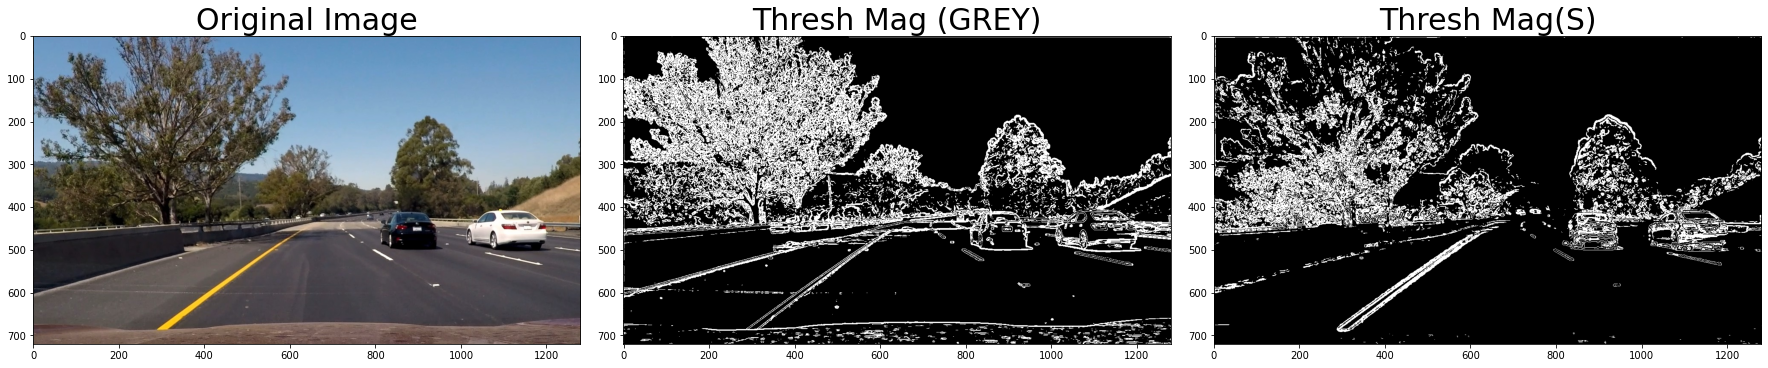

In [3]:
img = cv2.imread('test_images/test6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_scaled = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]
    

grey_threshold = thresh_mag(gray_scaled, kernel=5, thresh=[20, 100])
s_channel_threshold = thresh_mag(s_channel, kernel=5, thresh=[20, 100])
# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(grey_threshold, cmap='gray')
ax2.set_title('Thresh Mag (GREY)', fontsize=30)
ax3.imshow(s_channel_threshold, cmap='gray')
ax3.set_title('Thresh Mag(S)', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Combuting direction of the gradient

In [4]:
def grad_dir(img, kernel=3, thresh=[0, np.pi/2]):
    x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=kernel)
    y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absolute_grad = np.arctan2(np.absolute(y), np.absolute(x))
    output =  np.zeros_like(absolute_grad)
    output[(absolute_grad >= thresh[0]) & (absolute_grad <= thresh[1])] = 1

    return output

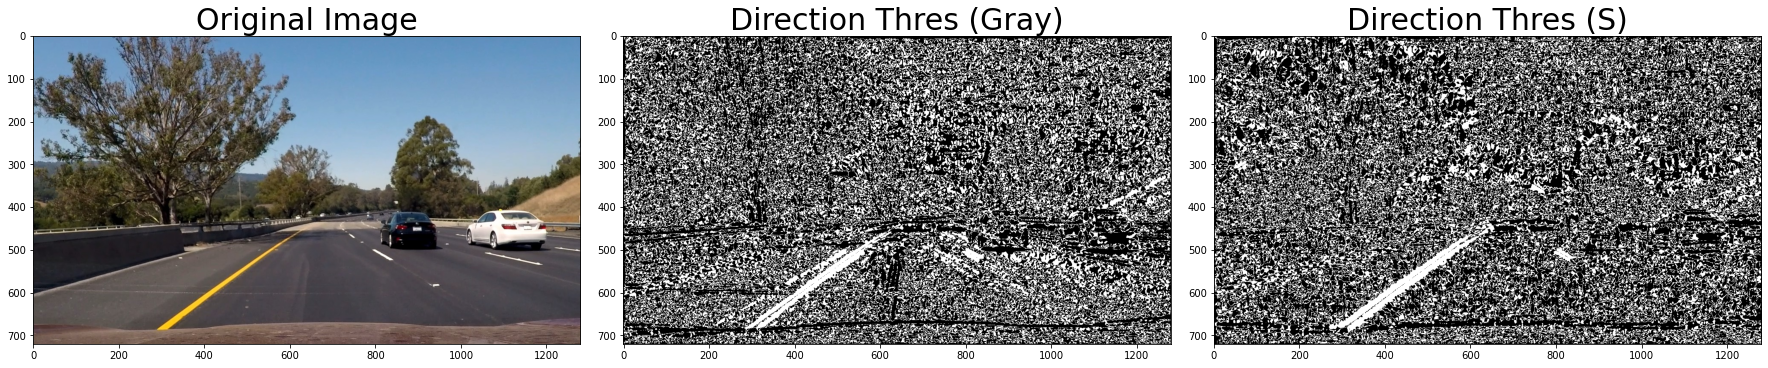

In [5]:
img = cv2.imread('test_images/test6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_scaled = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

dir_gray =grad_dir(gray_scaled, kernel=15, thresh=[0.7, 1.3])
dir_s = grad_dir(s_channel, kernel=15, thresh=[0.7, 1.3])

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dir_gray, cmap='gray')
ax2.set_title('Direction Thres (Gray)', fontsize=30)
ax3.imshow(dir_s, cmap='gray')
ax3.set_title('Direction Thres (S)', fontsize = 30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Calculating absolute threshold

In [6]:
def abs_thresh(img,thresh=[0,255]):
    gray_scaled = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    abs_x =np.absolute(cv2.Sobel(gray_scaled, cv2.CV_64F, 1, 0))
    abs_y =np.absolute(cv2.Sobel(gray_scaled, cv2.CV_64F, 0, 1))
    scaled_x= np.uint8(255*abs_x/np.max(abs_x))
    scaled_y= np.uint8(255*abs_y/np.max(abs_y))
    
    output_x =np.zeros_like(scaled_x)
    output_y =np.zeros_like(scaled_y)
    output_x[(scaled_x >= thresh[0]) & (scaled_x <= thresh[1])] = 1
    output_y[(scaled_y >= thresh[0]) & (scaled_y <= thresh[1])] = 1
    
    return output_x, output_y

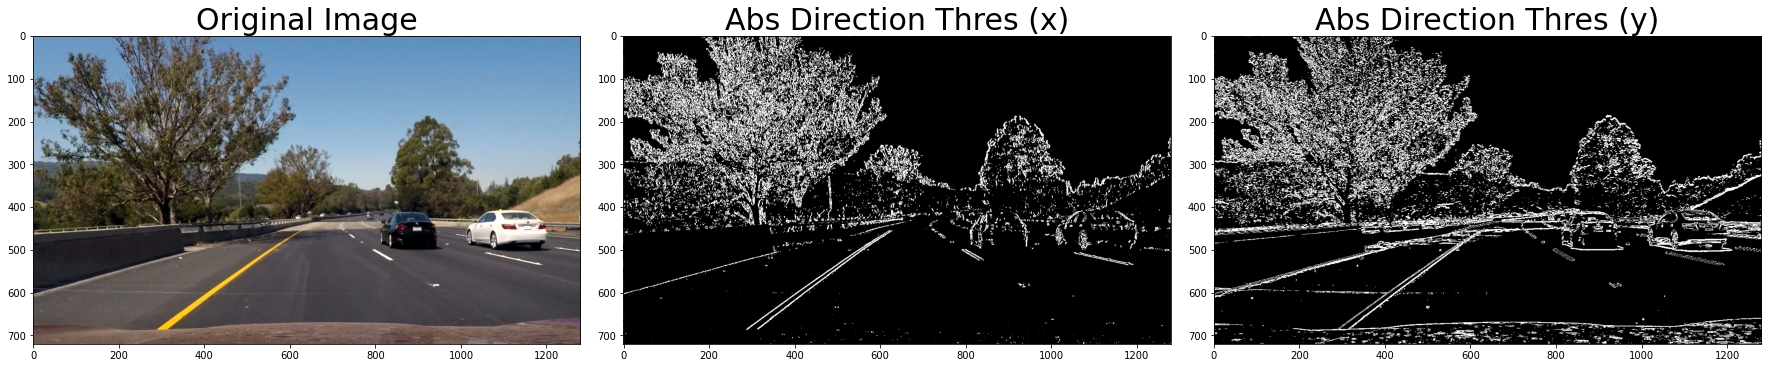

In [7]:
img = cv2.imread('test_images/test6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


abs_x,abs_y = abs_thresh(img=img,thresh=[20,100])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(abs_x, cmap='gray')
ax2.set_title('Abs Direction Thres (x)', fontsize=30)
ax3.imshow(abs_y, cmap='gray')
ax3.set_title('Abs Direction Thres (y)', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Combining thresholds 

In [8]:
def combined(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    abs_x,abs_y = abs_thresh(img=img,thresh=[20,100])
    dir_s =grad_dir(s_channel,15,[0.7,1.3])
    mag_s= thresh_mag(img=s_channel,kernel=3,thresh=[20,100])
    
    combined = np.zeros_like(dir_s)
    combined[((abs_x == 1) & (abs_y == 1)) | ((mag_s == 1) & (dir_s == 1))] = 1
    return combined

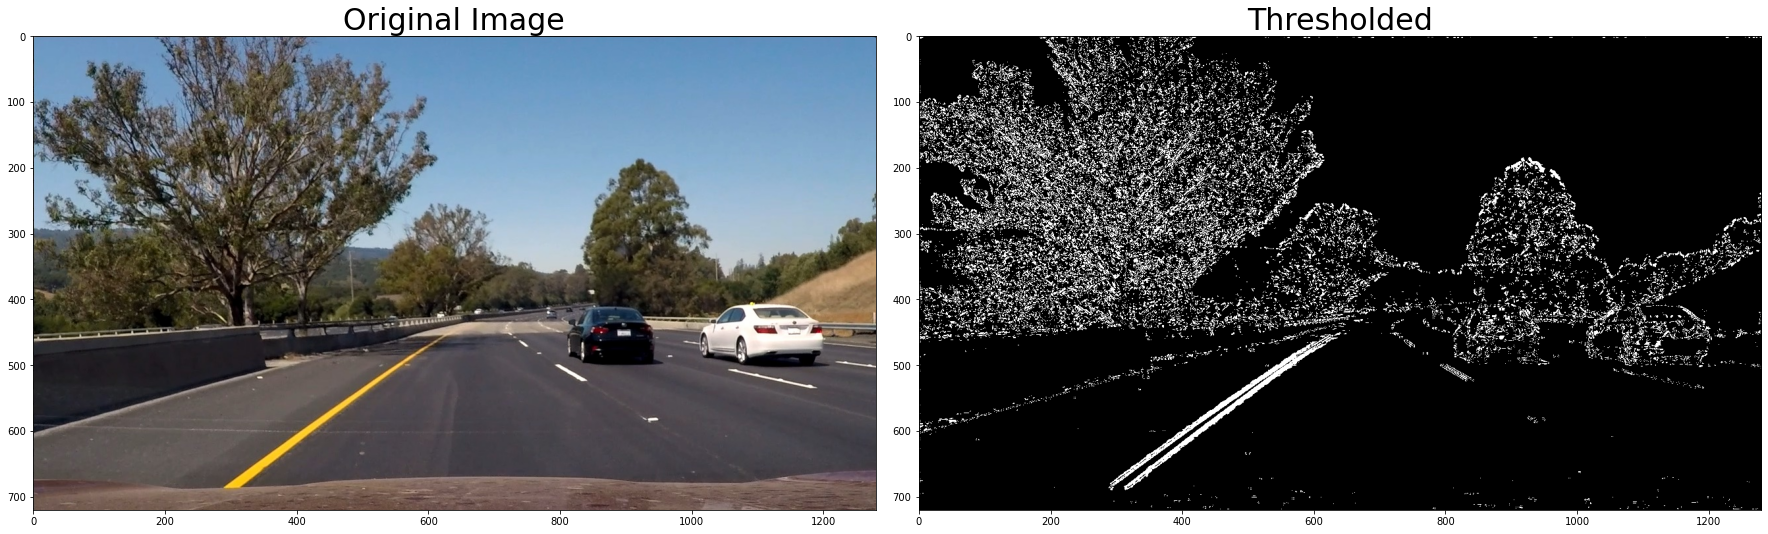

In [9]:
img = cv2.imread('test_images/test6.jpg')
combined = combined(img)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded', fontsize=30)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)